# <center>Don't Overfit II</center>
<center>Author: Tudor Morariu </center>

## Pas 1: Citirea si Procesarea datelor

In [52]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


data = pd.read_csv("train.csv");
data.drop(columns=["id"], inplace=True);

display(data);

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,0.216,-0.510,0.101,-0.602,-0.721,-0.545,1.564,2.003,-1.940,1.285,-0.987,-1.370,1.373,-0.495,0.113,-0.523,0.053,-0.888,0.249,0.687,1.363,0.169,-1.122,1.209,0.891,0.866,0.847,-1.110,1.224,-1.302,-1.647,-0.091,0.255,0.730,-0.380,0.294,-0.725,0.844,1.002,-1.267,-0.043,1.158,0.779,-0.733,-0.501,1.841,1.459,0.847,1.926,-0.316,0.044,-0.294,0.120,-1.050,0.730,-1.001,-0.321,0.407,0.469,0.445,1.632,0.273,1.557,1.196,-0.548,-0.275,0.179,0.584,-1.873,0.928,0.720,0.885,0.044,-1.131,-1.576,0.616,1.957,-0.518,1.494,1.573,-0.484,0.590,-0.387,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.150,-0.156,0.393,-0.117,0.444,0.948,-0.608,-0.106,-0.491,-0.608,1.565,1.013,-1.391,0.807,-0.607,-0.856,1.230,0.124,-0.336,1.758,-1.649,-1.429,-1.322,-1.501,2.125,-0.572,1.178,-1.451,-0.374,2.386,1.883,0.758,0.295,1.261,-0.837,0.140,-0.183,0.756,0.616,1.371,0.820,-0.702,-1.266,0.496,-0.669,-0.325,-0.170,0.147,-1.134,0.077,1.271,-0.087,-1.431,1.640,0.694,0.949,-2.400,0.657,-0.431,0.124,-0.335,-2.820,0.573,-0.755,3.798,-0.001,0.998,-0.543,1.018,0.883,-1.037,0.513,0.694,0.856,-0.523,0.596,0.971,0.279,2.684,-0.057,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,-0.605,1.917,-1.157,0.394,-0.482,1.591,0.106,-0.959,0.600,-1.147,-1.064,3.080,1.057,0.947,-1.125,1.288,-0.171,1.124,-0.454,0.698,-0.028,2.208,0.014,0.872,2.286,-0.822,0.416,1.486,-0.331,-0.993,-0.071,0.543,-0.096,0.041,0.138,1.110,0.692,1.407,-0.234,-1.899,-0.131,0.934,0.802,-1.041,2.004,1.424,0.423,-0.352,-0.656,-0.053,1.036,-1.228,-0.854,-0.748,1.180,0.575,-1.472,-1.215,-0.889,0.004,-0.145,-0.933,-0.713,0.869,0.539,-0.911,-0.638,0.895,-1.896,-0.604,0.312,1.883,-0.292,-0.849,-0.453,0.894,0.339,2.095,0.336,1.290,0.057,-0.159,0.539,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.554,-0.6

*   **Obs 1**: Datele par sa fie random. Voi plota matrice de corelatie pentru a vedea daca sunt aleatorii.
*   **Obs 2**: Valorile sunt numere, nu trebuie sa le transform din *object* in *int*

### Pas 2: Matrice de correlatie

<AxesSubplot:>

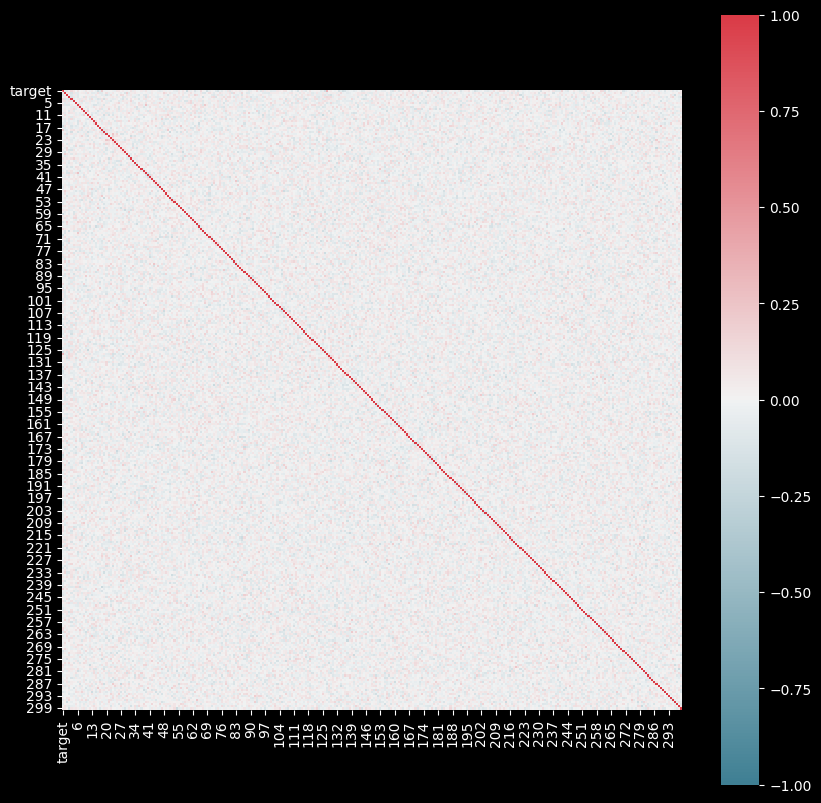

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs**: Datele nu par corelate intre ele.

### Pas 3: Normalizare

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

data = pd.DataFrame(scaler.fit_transform(data), data.index, data.columns);

display(data);

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,0.382417,0.311863,0.421628,0.596574,0.748000,0.659405,0.432580,0.471463,0.438884,...,0.543863,0.464034,0.566839,0.393416,0.557055,0.515525,0.613794,0.613695,0.691074,0.280484
1,0.0,0.425109,0.536009,0.839849,0.727770,0.870095,0.557533,0.843099,0.355556,0.669511,...,0.367876,0.394217,0.358732,0.765202,0.651490,0.247577,0.633282,0.521670,0.187238,0.362398
2,0.0,0.593343,0.717106,0.400825,0.334001,0.541333,0.575330,0.251147,0.448601,0.397140,...,0.270323,0.664669,0.381872,0.627806,0.598838,0.444225,0.497543,0.498120,0.411437,0.544278
3,1.0,0.396527,0.343907,0.291248,0.554483,0.643810,0.685333,0.705965,0.428137,0.513838,...,0.259782,0.716502,0.617244,0.337641,0.369496,0.468211,0.392645,0.313477,0.664400,1.000000
4,0.0,0.722142,0.247937,0.625717,0.462464,0.498476,0.440626,0.566008,0.307434,0.389760,...,0.472753,0.650388,0.379514,0.587675,0.379427,0.421883,0.851720,0.812784,0.455544,0.311308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0,0.563133,0.462373,0.325323,0.639213,0.619238,0.826634,0.465761,0.549800,0.747694,...,0.771127,0.775917,0.480324,0.390559,0.290051,0.625924,0.890527,0.763111,0.703975,0.352350
246,0.0,0.533104,0.269947,0.164455,0.453717,0.491810,0.708039,0.681080,0.255476,0.479244,...,0.326604,0.643336,0.735004,0.514896,0.531385,0.406769,0.340281,0.325351,0.654289,0.442609
247,0.0,0.154486,0.195339,0.395445,0.648324,0.376952,0.163701,0.411931,0.387530,0.667666,...,0.283545,0.414492,0.628150,0.144334,0.573168,0.818958,0.490764,0.661191,0.311367,0.275204
248,1.0,0.493849,0.459136,0.395445,0.575620,0.544571,0.359620,0.309036,0.420464,0.626153,...,0.634804,0.596262,0.878113,0.414910,0.521079,0.502382,0.590239,0.108450,0.428870,0.404973


## Pas 4: Plot-uri

### Pas 4.1: Plot PCA 2D

Fiind o problema de clasificare, plotand cu PCA ar trebui sa se vada o distictie clara intre doua clustere.

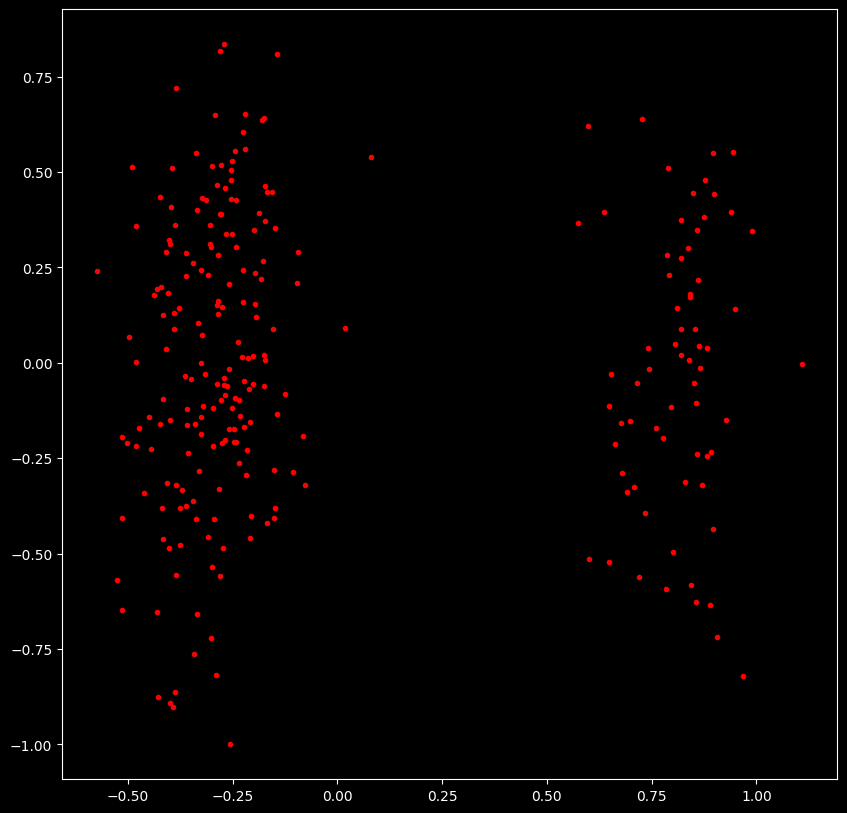

In [34]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components=2);

points = pca2d.fit_transform(data);

pointsx_true = [];
pointsy_true = [];

pointsx_false = [];
pointsy_false = [];

pointsx = [];
pointsy = [];

linie = 0; # Iterator pentru fiecare linie.

for x, y in points:
    if(data.loc[linie, "target"] == 1.0):
        pointsx_true.append(x);
        pointsy_true.append(y);
    else:
        pointsx_false.append(x);
        pointsy_false.append(y);
    
    pointsx.append(x);
    pointsy.append(y);
    linie += 1;

ax = plt.figure(figsize=(10, 10)).subplots();

#ax.plot(pointsx_true, pointsy_true, 'r.');
#ax.plot(pointsx_false, pointsy_false, 'b.');

ax.plot(pointsx, pointsy, 'r.');

plt.show();


### Pas 4.2: Plot PCA 3D

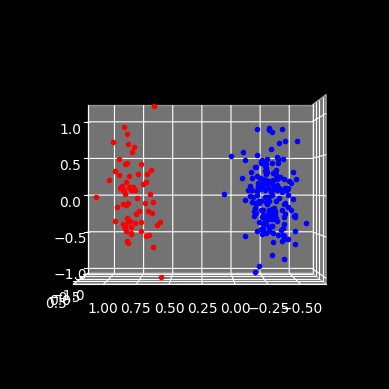

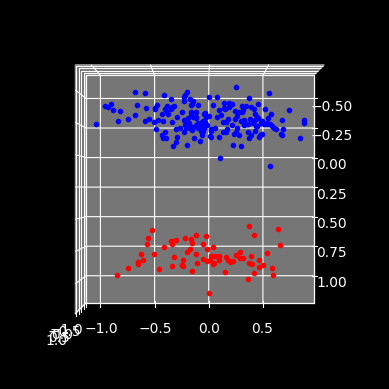

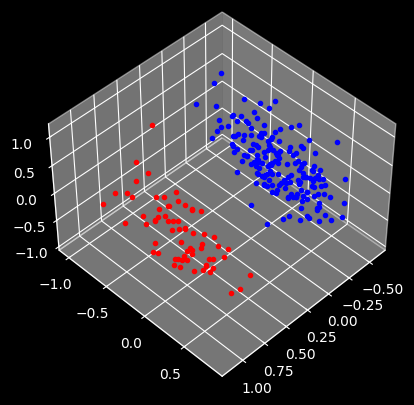

In [35]:
from sklearn.decomposition import PCA

pca3d = PCA(n_components=3);

points = pca3d.fit_transform(data);

pointsx_true = [];
pointsy_true = [];
pointsz_true = [];


pointsx_false = [];
pointsy_false = [];
pointsz_false = [];

linie = 0; # Iterator pentru fiecare linie.

for x, y, z in points:
    if(data.loc[linie, "target"] == 1.0):
        pointsx_true.append(x);
        pointsy_true.append(y);
        pointsz_true.append(z);
    else:
        pointsx_false.append(x);
        pointsy_false.append(y);
        pointsz_false.append(z);
    linie += 1;

ax1 = plt.figure().add_subplot(projection='3d')
ax2 = plt.figure().add_subplot(projection='3d')
ax3 = plt.figure().add_subplot(projection='3d')


ax1.view_init(0, 90)
ax2.view_init(90, 0)
ax3.view_init(45, 45)

ax1.plot(pointsx_true, pointsy_true, pointsz_true, 'r.');
ax1.plot(pointsx_false, pointsy_false, pointsz_false, 'b.');

ax2.plot(pointsx_true, pointsy_true, pointsz_true, 'r.');
ax2.plot(pointsx_false, pointsy_false, pointsz_false, 'b.');

ax3.plot(pointsx_true, pointsy_true, pointsz_true, 'r.');
ax3.plot(pointsx_false, pointsy_false, pointsz_false, 'b.');

plt.show();

<img title="3D PCA plot" src="./plots/plot3d_0_90.png" width="400" height="400">
<img title="3D PCA plot" src="./plots/plot3d_90_0.png" width="400" height="400">
<img title="3D PCA plot" src="./plots/plot3d_45_45.png" width="400" height="400">




*   **Obs**: Se observa din cele 4 plot-uri o separare clara in doua clustere, deci suntem fericiti :)).

## Pas 5: Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3);

# Am ales test_size mic din cauza numarului mic de date.

train_f = train.drop(columns=["target"]).values;
train_l = train["target"].values;

test_f = test.drop(columns=["target"]).values;
test_l = test["target"].values;



## Pas 6: Alegerea si Pregatire Modelelor

### Pas 6.1: Logistic Regression



Modelul poate fi aplicat in aceasta situatie pentru ca datele sunt impartite in $2$ clustere bine definite.

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, tol=1e-8, verbose=0);

clf.fit(train_f, train_l);
print("Scor: %.4f" % clf.score(test_f, test_l))

Scor: 0.6800


### Pas 6.2: Keras Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

clf = Sequential()
clf.add(Dense(3, input_shape=(300,), activation='relu'))
clf.add(Dense(2, input_shape=(3,), activation='relu'))
clf.add(Dense(1, input_shape=(2,), activation='sigmoid'))

clf.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:

History = clf.fit(train_f, train_l, validation_data=(test_f, test_l), epochs=200);


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2446 - loss: 0.2540 - val_accuracy: 0.5467 - val_loss: 0.2501
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6348 - loss: 0.2494 - val_accuracy: 0.7067 - val_loss: 0.2488
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7333 - loss: 0.2485 - val_accuracy: 0.7067 - val_loss: 0.2482
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7491 - loss: 0.2477 - val_accuracy: 0.7067 - val_loss: 0.2477
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7170 - loss: 0.2474 - val_accuracy: 0.7067 - val_loss: 0.2471
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7670 - loss: 0.2461 - val_accuracy: 0.7067 - val_loss: 0.2465
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7454 - loss: 0.2457 - val_accuracy: 0.7067 - val_loss: 0.2460
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7277 - loss: 0.2454 - val_accuracy: 0.7067 - val_loss:

#### Pas 6.2.1: Ploting

{'accuracy': [0.2800000011920929, 0.6971428394317627, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428571581840515, 0.7428

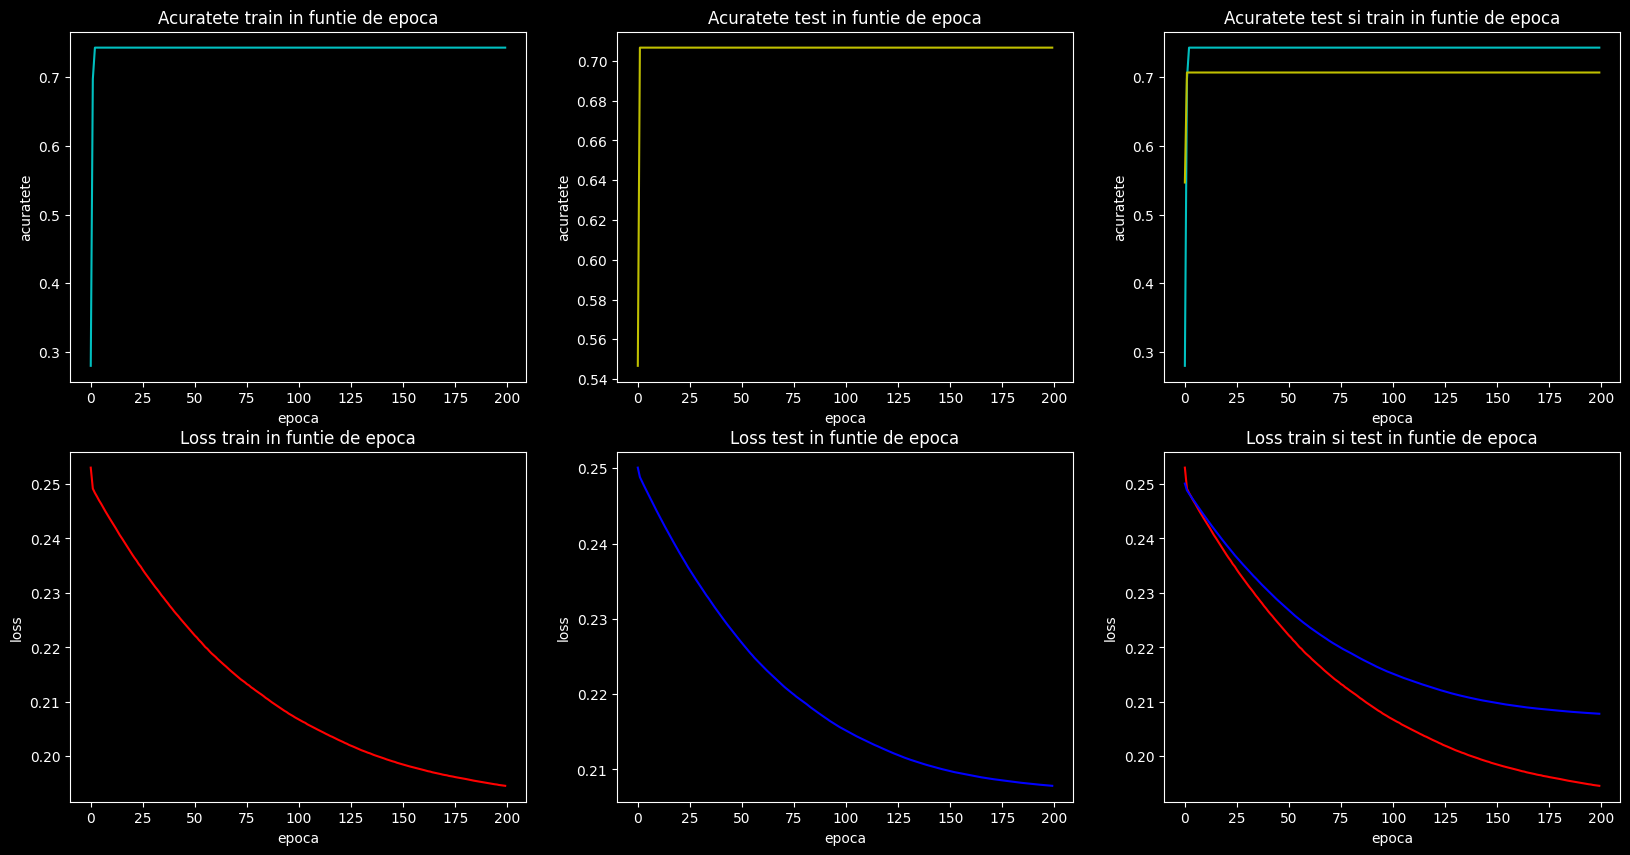

In [40]:

print(History.history)

f, ax = plt.subplots(2, 3);

f.set_figwidth(20);
f.set_figheight(10);

ax[0, 0].plot(History.history['accuracy'], 'c-')
ax[0, 0].set_xlabel("epoca");
ax[0, 0].set_ylabel("acuratete")
ax[0, 0].set_title("Acuratete train in funtie de epoca");

ax[0, 1].plot(History.history['val_accuracy'], 'y-')
ax[0, 1].set_xlabel("epoca");
ax[0, 1].set_ylabel("acuratete")
ax[0, 1].set_title("Acuratete test in funtie de epoca");


ax[0, 2].plot(History.history['accuracy'], 'c-')
ax[0, 2].plot(History.history['val_accuracy'], 'y-')
ax[0, 2].set_xlabel("epoca");
ax[0, 2].set_ylabel("acuratete")
ax[0, 2].set_title("Acuratete test si train in funtie de epoca");


ax[1, 0].plot(History.history['loss'], 'r-')
ax[1, 0].set_xlabel("epoca");
ax[1, 0].set_ylabel("loss")
ax[1, 0].set_title("Loss train in funtie de epoca");


ax[1, 1].plot(History.history['val_loss'], 'b-')
ax[1, 1].set_xlabel("epoca");
ax[1, 1].set_ylabel("loss")
ax[1, 1].set_title("Loss test in funtie de epoca");


ax[1, 2].plot(History.history['loss'], 'r-')
ax[1, 2].plot(History.history['val_loss'], 'b-')
ax[1, 2].set_xlabel("epoca");
ax[1, 2].set_ylabel("loss")
ax[1, 2].set_title("Loss train si test in funtie de epoca");


#### Pas 6.2.2: Scoring

In [41]:
print("Scor: %.4f" % History.history['val_accuracy'][199]);

Scor: 0.7067


### Pas 6.3: Standard Vector Machine Classifier

In [42]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

pca2d = PCA(n_components=2);
clf = LinearSVC(loss='hinge', verbose=0)


pca_points = pca2d.fit_transform(train);
pca_points_test = pca2d.fit_transform(test);

clf.fit(pca_points, train["target"]);



Scor: 1.0000


*  **Nota**: Training-ul il fac pe puntele returnate de *PCA* intr-un plan *2D*.

#### Pas 6.3.1: Plotare SVC

In [43]:
decision_function = clf.decision_function(pca_points) # Distanta fiecarui punct fata de granita pusa de SVC


iterator = 0; # Iterator al listei distante
boundary = 1; # Distanta la care se considera un punct "intre" granite

colors = { # Culori pentru plotul punctelor
    1.0: "blue",
    0.0: "red"    
}

support_vector_indices = [];
iterator = 0;



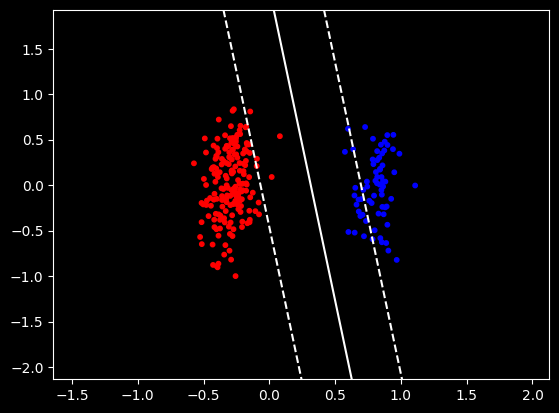

In [44]:

for dist in decision_function:
    if(abs(dist) < boundary):
        support_vector_indices.append(iterator);
    iterator += 1;

support_vectors = points[support_vector_indices]

plt.scatter(points[:, 0], points[:, 1], s=10, c=data["target"].map(colors))
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    clf,                                # Modelul nostru
    X=pca_points,                           # Puntele noastre
    ax=ax,                              # Cele doua grafice sa fie "merged"
    plot_method="contour",              # Flag sa nu umple "golul" dintre linii
    colors="w",                         # Culoarea
    levels=[-boundary, 0, boundary],    # Distanta fata de dreapta determinata de model si granitele definite
    linestyles=["--", "-", "--"],       # Stilul liniilor
)

*   **Obs**: Pe graficul de mai sus putem vedea functia trasata de SVC si "granitele".

#### Pas 6.3.2: Scoring

In [50]:
print("Scor: %.4f" % clf.score(pca_points_test, test["target"]));

Scor: 1.0000


### Pas 6.4: Random Decision Forest

Modelul este "aplicabil" pentru ca in graficele rezultate de PCA se observa granite "clare".

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

clf = RandomForestClassifier(max_depth=1000);
pca = PCA(n_components=2);

pca_points_train = pca.fit_transform(train);
pca_points_test = pca.fit_transform(test);

color_map = {
    1: "blue",
    0: "red"
}

cols = train["target"].map(color_map);

In [ ]:
clf.fit(pca_points_train, train["target"]);

#### Pas 6.4.1: Scoring

In [51]:

print("Scor: %.4f" % clf.score(pca_points_test, test["target"]));

Scor: 1.0000


#### Pas 6.4.2: Ploting

In [47]:
from sklearn.tree import export_graphviz

estimator = clf.estimators_[99]
export_graphviz(estimator, out_file='tree.dot', rounded=True, filled=True) # Exportam ultimpul estimator ca si DOT file

In [48]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) # Transformam DOT file-ul intr-un png

0

<img title="Cel mai bun tree" src="./tree.png" width="900">


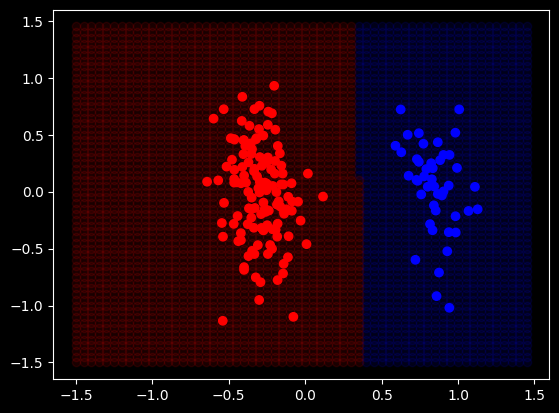

In [49]:
ax = plt.subplot();

ploting_x_points = np.arange(-1.5, 1.5, 0.05);
ploting_y_points = np.arange(-1.5, 1.5, 0.05);

ploting_x_true_points = [];
ploting_y_true_points = [];

ploting_x_false_points = [];
ploting_y_false_points = [];

for i in ploting_x_points:
    for j in ploting_y_points:
        pred_list = np.array([i, j]).reshape(1, -1);
        
        if(clf.predict(pred_list) == 1):
            ploting_x_true_points.append(i);
            ploting_y_true_points.append(j);
        
        else:
            ploting_x_false_points.append(i);
            ploting_y_false_points.append(j);

ax.scatter(ploting_x_true_points, ploting_y_true_points, c='blue', alpha=0.1);
ax.scatter(ploting_x_false_points, ploting_y_false_points, c='red', alpha=0.1);

ax.scatter(pca_points_train[:, 0], pca_points_train[:, 1], c=cols);

plt.show();

In graficul de mai sus vedem granita dintre punctele adevarate si cele false.

## Pas 7: Concluzii

1.   Dataset-ul se imparte foarte frumos in $2$ clustere vizibile cu **PCA**. In consecinta putem antrena modelele cu input datele de la **PCA** pentru o optimizare de timp.

2.   Modelul de Neural Network nu ii optim pentru probleme de clasificare binara.

## Pas 8: Imbunatatiri Posibile

1.   Folosirea altor modele.
2.   